# Polynomial Regression


In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet

np.random.seed(42)

Let's look at an example. First, let’s generate some nonlinear data, based on a simple quadratic equation [*] (plus some noise):

[*] $y = ax^2 + bx + c$

In [2]:
num_samples = 100
x = 6 * np.random.rand(num_samples, 1) - 3
random_noise = np.random.randn(num_samples, 1)
y = 0.5 * x**2 + x + 2 + random_noise

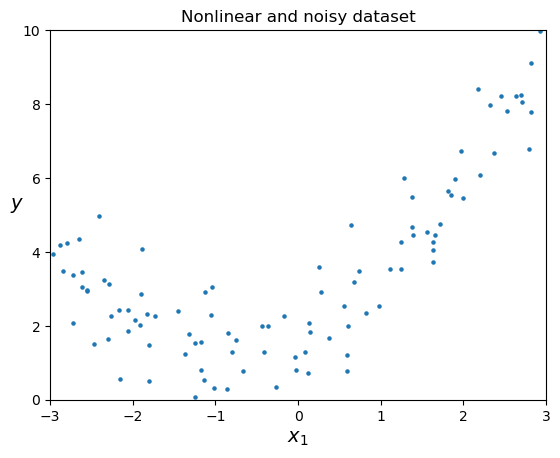

In [3]:
plt.scatter(x, y, s=5)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.title('Nonlinear and noisy dataset')
plt.show()

### Creating a polynomial

In [6]:
# Our example has only a single feature ("x"). Hence, we only have to add "x^2" as new feature
x_poly = np.concatenate((x**2, x), axis=1)

# New dimensionality ==> (<num_sample>, 2)
print(x_poly.shape)

(100, 2)


In [7]:
lin_reg = LinearRegression()

lin_reg.fit(x_poly, y)

print('Coeff a for x^2:', lin_reg.coef_[0, 0])
print('Coeff b for x:', lin_reg.coef_[0, 1])
print('Intercept c:', lin_reg.intercept_[0])

Coeff a for x^2: 0.5015459049995633
Coeff b for x: 1.0463003385415632
Intercept c: 1.999582280349789


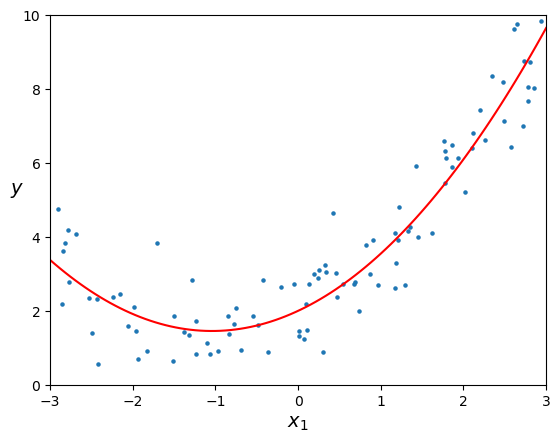

In [8]:
x_new = np.linspace(-3, 3, 100).reshape(100, 1)
x_new_poly = np.concatenate((x_new**2, x_new), axis=1)
y_new_pred = lin_reg.predict(x_new_poly)

plt.scatter(x, y, s=5)
plt.plot(x_new, y_new_pred, c='r')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

### Creating polynomial features with PolynomialFeatures

In [13]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

x_poly = poly_features.fit_transform(x)

In [15]:
lin_reg = LinearRegression()

lin_reg.fit(x_poly, y)

LinearRegression()

In [17]:
x_new = np.linspace(-3, 3, 100).reshape(100, 1)

x_new_poly = poly_features.fit_transform(x_new)

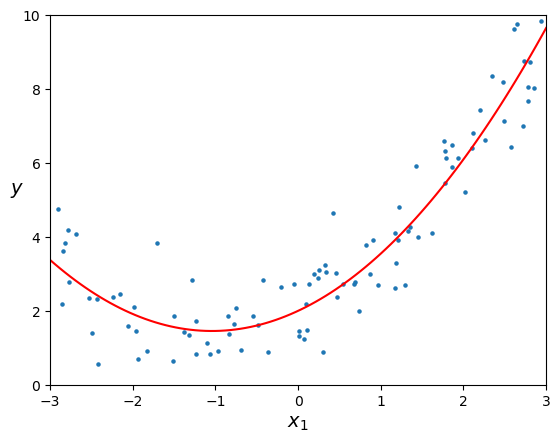

In [18]:
y_new_pred = lin_reg.predict(x_new_poly)

plt.scatter(x, y, s=5)
plt.plot(x_new, y_new_pred, c='r')
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.axis([-3, 3, 0, 10])

plt.show()

In [ ]:
# TODO: Check the coefficients of the polynomial
print(f'The original polynomial was: 0.5 x^2 + x + 2 + random_noise')

### Higher-degree polynomials

Assuming that we didn't know that the data came from a polynomial of degree 2, you might consider increasing the degree even further. Well, let's see what happens.

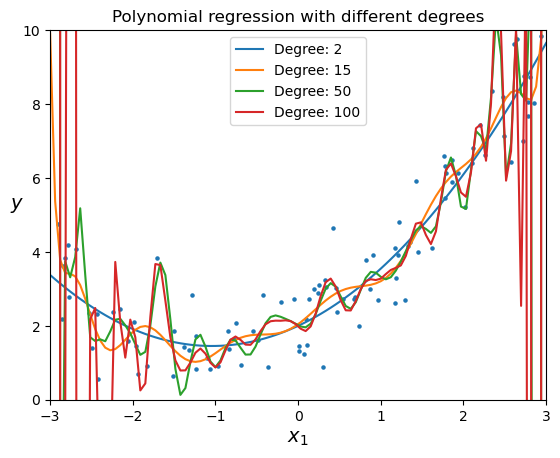

In [20]:
# Although LinearRegression() uses the normal equation to compute and exact solution
# it's better to scale the parameters of the transformed features to avoid numerical instability
# Note that we are dealing with numbers x^100
scaler = StandardScaler()

lin_reg = LinearRegression()

plt.scatter(x, y, s=5)

x_test = np.linspace(-3, 3, 100).reshape(100, 1)

for deg in [2, 15, 50, 100]:
    
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    
    x_train_poly = poly_features.fit_transform(x)
    x_test_poly = poly_features.fit_transform(x_test)
    
    # Scale the inputs to avoid numerical instability
    scaler.fit(x_train_poly)
    x_train_poly = scaler.transform(x_train_poly)
    x_test_poly = scaler.transform(x_test_poly)

    # Fit and predict
    lin_reg.fit(x_train_poly, y)
    y_test_pred = lin_reg.predict(x_test_poly)
    
    plt.plot(x_test, y_test_pred, label=f'Degree: {deg}')

    
plt.axis([-3, 3, 0, 10])
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.title('Polynomial regression with different degrees')
plt.legend()

plt.show()

In [ ]:
# Question: What is the "best" model? How can we verify that?

# Regularized Linear Models

In [28]:
np.random.seed(42)

num_samples = 20
x = 3 * np.random.rand(num_samples, 1)
y = 1 + 0.5 * x + np.random.randn(num_samples, 1) / 1.5

x_test = np.linspace(0, 3, 100).reshape(100, 1)

## Ridge Regression

In [33]:
poly_features = PolynomialFeatures(degree=10, include_bias=False)

x_train_poly = poly_features.fit_transform(x)
x_test_poly = poly_features.fit_transform(x_test)

In [34]:
scaler = StandardScaler()

scaler.fit(x_train_poly)

x_train_poly = scaler.transform(x_train_poly)
x_test_poly = scaler.transform(x_test_poly)

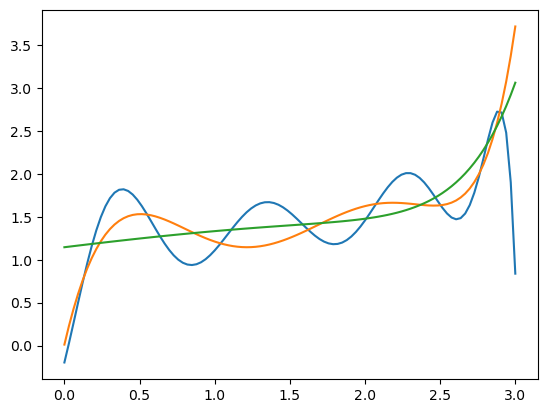

In [35]:
for regularization_strength in [0., 1e-5, 1.]:
    
    # TODO: Train the ridge regression model
    ridge_model = Ridge(alpha=regularization_strength)
    
    ridge_model.fit(x_train_poly, y) 
    
    # Predict and plot the values for the test points
    y_test_pred = ridge_model.predict(x_test_poly)
    
    plt.plot(x_test, y_test_pred, label=f'Alpha: {regularization_strength}')


In [ ]:
plt.scatter(x, y, s=5)

plt.axis([0, 3, 0, 4])
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.title('Ridge regression with different alpha values')
plt.legend()

plt.show()

## Lasso Regression

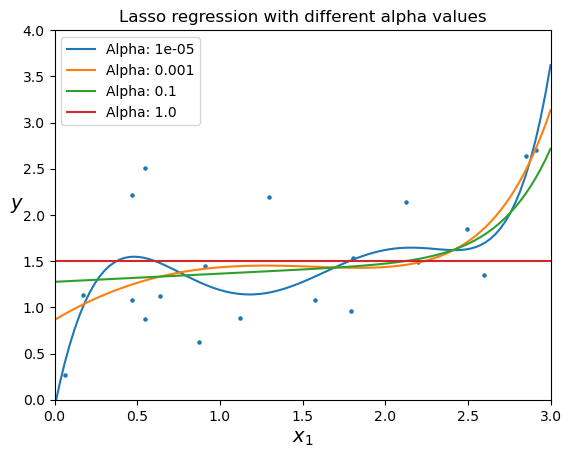

In [37]:
scaler = StandardScaler()

poly_features = PolynomialFeatures(degree=10, include_bias=False)

x_train_poly = poly_features.fit_transform(x)
x_test_poly = poly_features.fit_transform(x_test)

scaler.fit(x_train_poly)
x_train_poly = scaler.transform(x_train_poly)
x_test_poly = scaler.transform(x_test_poly)

plt.scatter(x, y, s=5)

for regularization_strength in [1e-5, 1e-3, 0.1, 1.]:

    ridge_reg = Lasso(alpha=regularization_strength, max_iter=10**8)

    # Fit and predict
    ridge_reg.fit(x_train_poly, y)
    y_test_pred = ridge_reg.predict(x_test_poly)
    
    plt.plot(x_test, y_test_pred, label=f'Alpha: {regularization_strength}')

plt.axis([0, 3, 0, 4])
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.title('Lasso regression with different alpha values')
plt.legend()

plt.show()

## Elastic Net

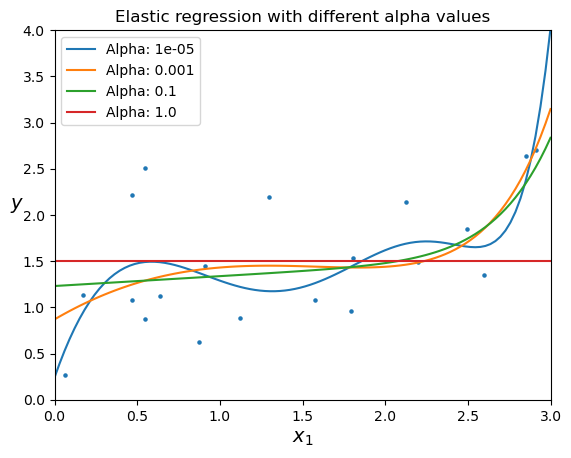

In [38]:
scaler = StandardScaler()

poly_features = PolynomialFeatures(degree=10, include_bias=False)

x_train_poly = poly_features.fit_transform(x)
x_test_poly = poly_features.fit_transform(x_test)

scaler.fit(x_train_poly)
x_train_poly = scaler.transform(x_train_poly)
x_test_poly = scaler.transform(x_test_poly)

plt.scatter(x, y, s=5)

for regularization_strength in [1e-5, 1e-3, 0.1, 1.]:

    # TODO: Train and predict using elastic regression
    elastic_reg = ElasticNet(alpha=regularization_strength, max_iter=10**8)
    
    elastic_reg.fit(x_train_poly, y)
    
    y_test_pred = elastic_reg.predict(x_test_poly)

    
    plt.plot(x_test, y_test_pred, label=f'Alpha: {regularization_strength}')

plt.axis([0, 3, 0, 4])
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.title('Elastic regression with different alpha values')
plt.legend()

plt.show()